In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def boundary(matrix, row, col):
    if row < 0 or col < 0:
        return False
    if row > len(matrix)-1 or col > len(matrix)-1:
        return False
    return True

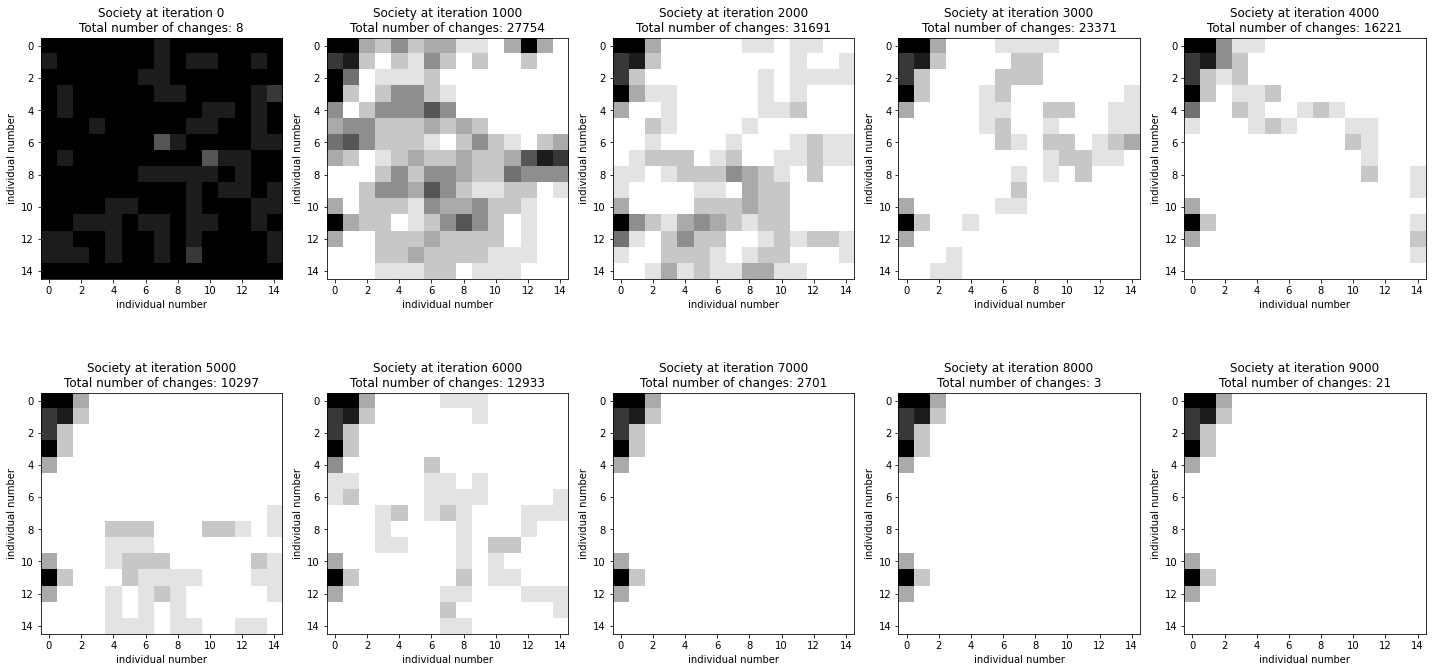

In [9]:
fig,axs = plt.subplots(nrows=2,ncols=5,figsize=(20,10))

opinions=[0,1,2,3,4,5,6,7,8,9]
different_opinions=[0,1,2,3,4,5,6,7,8,9]
c=0 #counter

clases=[0,1,2,3,4,5,6,7,8,9] #topics
n=15 #square root of the number of persons


individuals=np.reshape(np.random.choice(opinions,5*n**2,p=(1/len(opinions))*np.ones(len(opinions))),(n,n,5))
individuals=individuals+1e-16 #to avoid numeric errors
for k in range(10000): 
    N=max(1,int((n**2)*0.5)) #number of persons that will possibly interact

    cam=np.linspace(0,n-1,n)
    P=(1/len(cam))*np.ones(len(cam))
    changes=np.reshape(np.random.choice(cam,2*N,p=P),(N,2))#persons who will possibly interact

    for i in changes: #Axelrod algorithm (for details, check this github account)
        i=[int(i[0]),int(i[1])]
        a1=np.random.choice([-1,1],1,p=[0.5,0.5])[0]
        al=np.random.uniform(0,1)
        if al>0.5:
            a=[a1,0]
        if al<0.5:
            a=[0,a1]
        if i[0]+a[0]<n and i[1]+a[1]<n and 0<i[0]+a[0] and 0<i[1]+a[1]:
            u=np.sum(np.floor(1/(abs(individuals[i[0]+a[0],i[1]+a[1]]-individuals[i[0],i[1]])+1)))/len(individuals[0][0])
            v=np.random.uniform(0,1)
            if v<u and u!=1:
                b=[]
                for l in range(len(individuals[0][0])):
                    if individuals[i[0]+a[0],i[1]+a[1],l]!=individuals[i[0],i[1],l]:
                        b.append(l)
                l=np.random.choice(b,1,p=(1/len(b))*np.ones(len(b)))[0]
                individuals[i[0],i[1],l]=individuals[i[0]+a[0],i[1]+a[1],l]
                c+=1

    #for making the graph
    if k/1000==int(k/1000): 
        K=np.zeros((len(individuals),len(individuals[0])))
        for i in range(len(individuals)):
            for j in range(len(individuals[0])):
                J=np.sum(np.floor(1/(abs(individuals-individuals[i,j])+1)),axis=2)/len(individuals[0][0])
                sum=[]
                neighbors=[[0,1],[1,0],[0,-1],[-1,0]]
                for v in neighbors:
                    if boundary(J,i+v[0],j+v[1])==True:
                        sum.append(v)
                ent=0
                for v in sum:
                    ent+=J[i+v[0],j+v[1]]
                K[i,j]=np.round(ent/len(sum),1)


        dct = {0: 0., 0.1:1, 0.2: 2., 0.3: 3., 0.4: 4.,0.5:5.,0.6:6.,0.7:7.,0.8:8.,0.9:9.,1:10}
        m = [[dct[i] for i in j] for j in K]


        axs[k//5000,(k%5000)//1000].imshow(m, cmap='gray', vmin=1, vmax=10) #select the tipe of graph
        axs[k//5000,(k%5000)//1000].set_title(f'Society at iteration {k}\nTotal number of changes: {c}')
        axs[k//5000,(k%5000)//1000].set_xlabel('individual number')
        axs[k//5000,(k%5000)//1000].set_ylabel('individual number')
        c=0


    thinker=np.random.choice(cam,2,p=P) #choose the person to be the thinker
    thinker=[int(thinker[0]),int(thinker[1])]
    L=np.sum(np.floor(1/(abs(individuals-individuals[thinker[0],thinker[1]])+1)),axis=2)/len(individuals[0][0]) #calculate the similarity between each person in the society and the thinker
    sim=1
    a=0
    S=abs(np.random.normal(1.4,0.25)) #receptivity
    
    while sim>=S: #finding the ball of maximum radius
        entries=[]
        gate=0
        a+=1 #radius from the ball
        for i in range(-a,a+1):
            for j in range(-a,a+1):
                if boundary(L,thinker[0]+i,thinker[1]+j)==True:
                    gate+=1
                    entries.append(L[thinker[0]+i,thinker[1]+j])

        if gate==(2*a+1)**2: #if the ball is completely contained in the society
            sim=(np.sum(entries)-1)/len(entries) #recalculation of similarity

        if gate<(2*a+1)**2: #if the ball is not completely cointained
            a=a-1 #chose the last ball contained
            sim=0 #end loop


    entries=[]
    gate=0
    for i in range(-a,a+1):
        for j in range(-a,a+1):
            if boundary(L,thinker[0]+i,thinker[1]+j)==True:
                gate+=1
                entries.append(L[thinker[0]+i,thinker[1]+j])

    prob_idea=len(entries)/n**2 #calculating the probability the thinker has a new idea
    opinion=0
    op=0
    T=abs(np.random.normal(0.5,0.25)) #thinker's creativity
    if prob_idea>T: #if the thinker is creative enough
        en=np.random.choice([0,1,2,3,4],1,p=(1/5)*np.ones(5))[0] #selects a topic from the society
        for i in range(-a,a+1): #collects the opinion of that topic from the ball of maximum radius
            for j in range(-a,a+1):
                if boundary(L,thinker[0]+i,thinker[1]+j)==True:
                    opinion+=individuals[thinker[0]+i,thinker[1]+j,en] #sums all the opinions from the topic "en" from people in the ball of maximum radius
                    op+=1
        opinion=opinion/op #average of the opinions
        new_idea=(2*individuals[thinker[0],thinker[1],en]+opinion)/2 #the new idea is the average between the average opinion on the ball and the thinker's previuos opinion 
        individuals[thinker[0],thinker[1],en]=new_idea #the opinion from the thinker on the topic "en" changes
    else:
        new_idea=opinions[0]
        
plt.tight_layout()
plt.show()